In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

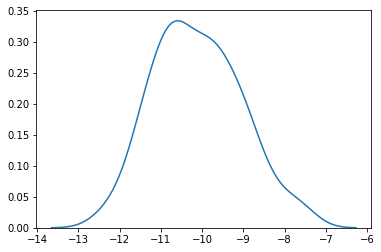

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 2.0581: 100%|██████████| 1500/1500 [00:05<00:00, 292.33it/s]


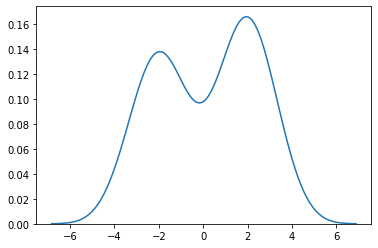

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([ 1.696504  ,  4.256496  ,  3.384479  ,  2.016127  ,
              2.8980527 , -3.6852293 ,  0.69236153, -1.619671  ,
              0.3770331 , -2.4932637 , -1.2198868 , -2.1530032 ,
              0.6327159 ,  1.7429644 , -2.3309975 , -1.8752501 ,
             -1.091348  ,  0.90001345,  1.3448622 , -3.6794019 ,
             -2.8579948 , -0.5061241 ,  1.25302   ,  2.8995547 ,
              0.43115067,  3.436971  , -1.2064025 ,  1.8524753 ,
              3.7092285 ,  2.1390407 , -0.762216  ,  2.9475741 ,
             -3.1420944 ,  1.4078901 , -3.1451867 , -1.6788163 ,
             -2.0395832 ,  2.1837878 ,  1.9809011 , -1.9906329 ,
              2.2345376 , -2.4940948 , -0.97849137, -1.2578973 ,
              1.6605368 , -0.8078804 , -2.005266  ,  2.7166443 ,
              1.0061867 ,  0.97941506,  2.204761  ,  1.9680485 ,
              0.02599451,  1.4467524 ,  3.8067694 ,  3.150568  ,
             -1.5849183 , -2.6531072 ,  2.4990149 , -1.622836  ,
             -1.857344  ,